In [167]:
import numpy as np
import healpy as hp
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.table import Table, Column
import pylab
from pylab import plot
from astropy import cosmology
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'

In [168]:
print("\033[43;30mLendo os catalogos com footprint\033[m")
w = Table.read('new_w.fits')
r = Table.read('new_r.fits') 
k = Table.read('new_k.vot')
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k) 

Lendo os catalogos com footprint
Wen: 80917
Rykoff: 18758
Koester: 13611


In [169]:
print("\033[43;30mValores de Ra, Dec e z de cada catalogo\033[m")
c_w = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))
c_k = SkyCoord(ra = k['RAJ2000'], dec = k['DEJ2000'], distance = cosmo.comoving_distance(k['zph']))

Valores de Ra, Dec e z de cada catalogo


In [170]:
# Mpc dz=0.05 e 0.1 em funcao de z

d = cosmo.comoving_distance(0.05)
print d

d = cosmo.comoving_distance(0.1)
print d

213.887832857 Mpc
422.982356046 Mpc


# Match do Wen com o Rykoff

In [171]:
# Função distlim
# Acha a distribuição de indices por raio
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, i*u.kpc)
    lista_i.append(len(idxc_w))
    lista_r.append(i)

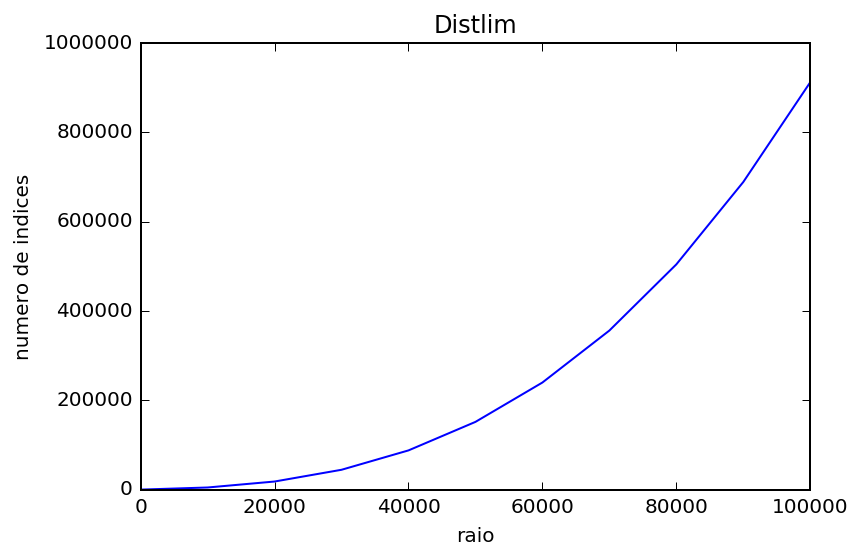

In [172]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.ylabel('numero de indices')
plt.xlabel('raio')
plt.title('Distlim')

In [173]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 20000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do rykoff =',len(idxc_r)

Objects around to catalog 3d
Números de objetos do wen = 18087
Números de objetos do rykoff = 18087


(array([  8.17200000e+03,   5.31200000e+03,   2.83400000e+03,
          1.02600000e+03,   3.90000000e+02,   1.82000000e+02,
          9.00000000e+01,   4.60000000e+01,   3.10000000e+01,
          4.00000000e+00]),
 array([  1.36877710e-07,   3.06406977e-01,   6.12813818e-01,
          9.19220658e-01,   1.22562750e+00,   1.53203434e+00,
          1.83844118e+00,   2.14484802e+00,   2.45125486e+00,
          2.75766170e+00,   3.06406854e+00]),
 <a list of 10 Patch objects>)

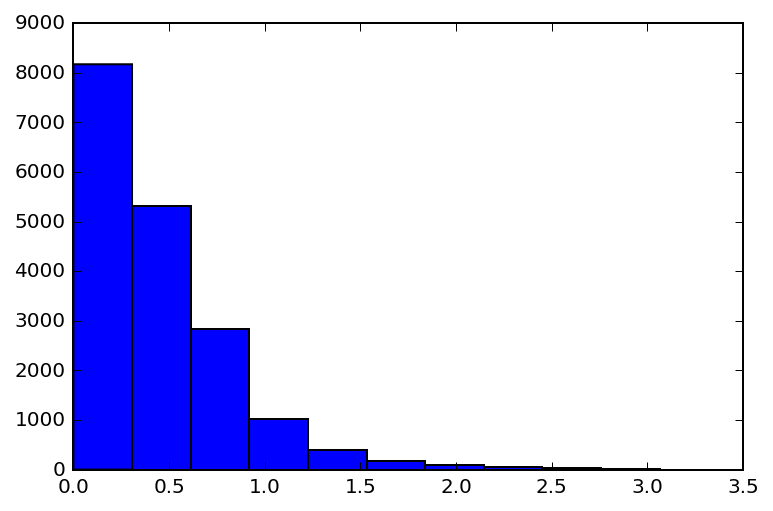

In [174]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  511.,   698.,   927.,  1139.,  1464.,  1811.,  2220.,  2647.,
         3158.,  3512.]),
 array([  8.89832252e-03,   2.00798681e+00,   4.00707529e+00,
          6.00616377e+00,   8.00525225e+00,   1.00043407e+01,
          1.20034292e+01,   1.40025177e+01,   1.60016062e+01,
          1.80006947e+01,   1.99997832e+01]),
 <a list of 10 Patch objects>)

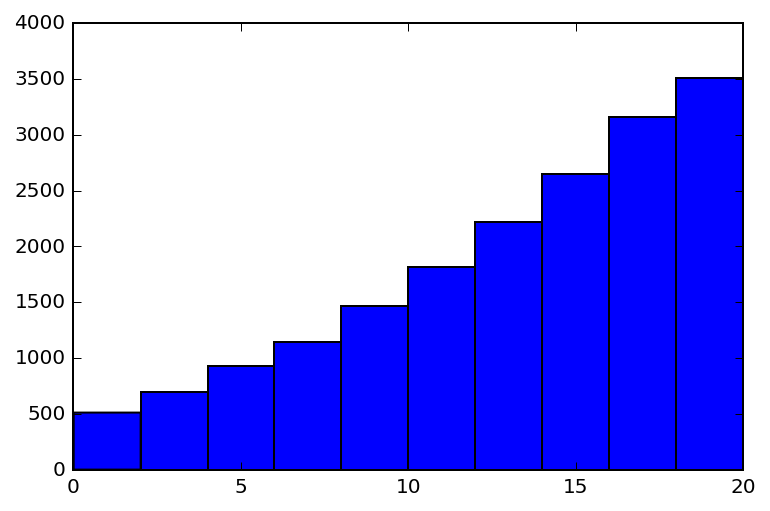

In [175]:
# Histograma 3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

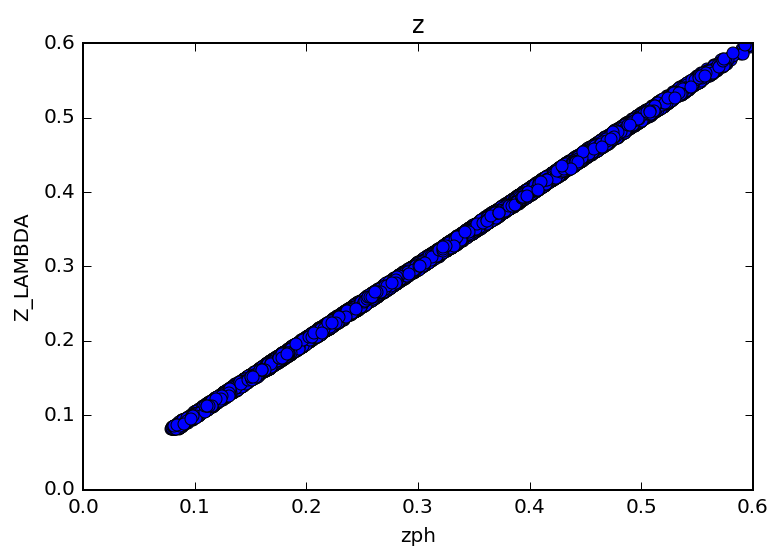

In [176]:
# Plot z vs z
iw = w[idxc_w]
ir = r[idxc_r]
zw = iw['zph']
zr = ir['Z_LAMBDA']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zr, 'bo')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

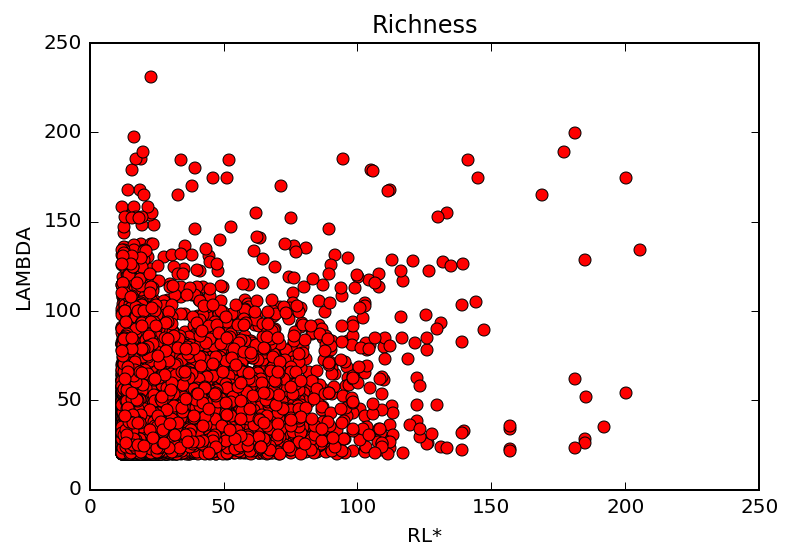

In [177]:
# Plor rich vs rich
rw = iw['RL*']
rr = ir['LAMBDA']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rw,rr, 'ro')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness')

(0, 10)

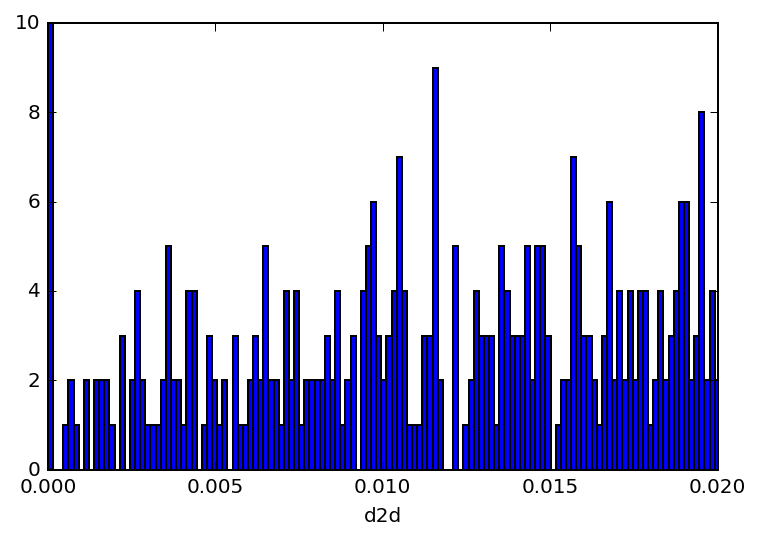

In [178]:
# Como a função search around pega os matches mais próximos em relação a cada objeto, muitos desses matches são
# repetidos e incorretos, fazendo um plot do d2d em função do raio, podemos chegar no número de matches aproximados.
plt.hist(d2d, bins=20000)
plt.xlabel('d2d')
plt.xlim(0,0.02)
plt.ylim(0,10)

In [179]:
# Aplica-se o raio encontrado, depois pega os resultados do match e retira apenas esses indices do catalogo 
# correspondente, em seguida chama-se os parametros relacionados a aqueles indices.
print len(np.unique(idxc_w))
print len(np.unique(idxc_r))
print len(idxc_w[d2d<0.002*u.deg])
print len(idxc_r[d2d<0.002*u.deg])

obje_wr = idxc_w[d2d<0.002*u.deg]
obje_rw = idxc_r[d2d<0.002*u.deg]

o_wr = w[obje_wr]
o_rw = r[obje_rw]

ra_wr = o_wr['RAJ2000']
dec_wr = o_wr['DEJ2000']
z_wr = o_wr['zph']

ra_rw = o_rw['RA']
dec_rw = o_rw['DEC']
z_rw = o_rw['Z_LAMBDA']

14971
10953
3779
3779


# Match do Wen com o Koester

In [180]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_w, idxc_k, d2d, d3d = c_k.search_around_3d(c_w, i*u.kpc)
    lista_i.append(len(idxc_w))
    lista_r.append(i)

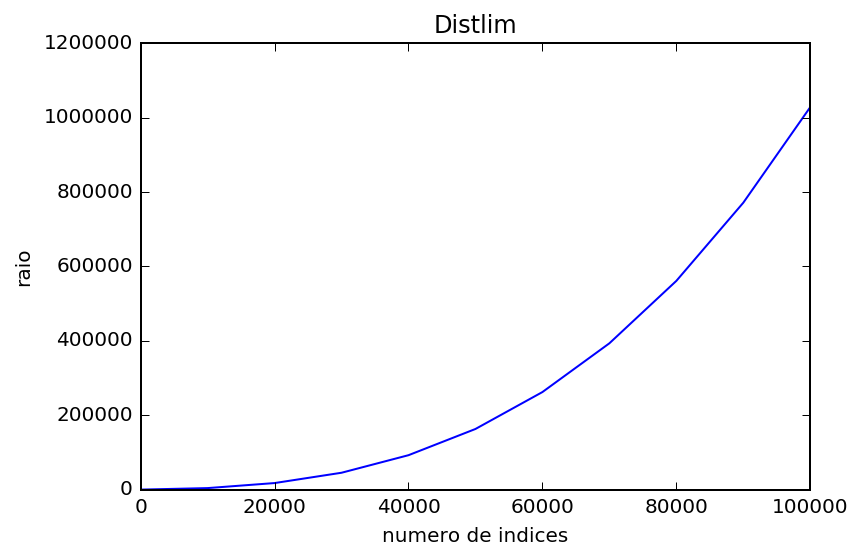

In [181]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.xlabel('numero de indices')
plt.ylabel('raio')
plt.title('Distlim')

In [182]:
print 'Objects around to catalog 3d'
idxc_w, idxc_k, d2d, d3d = c_k.search_around_3d(c_w, 17000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do wen = 12293
Números de objetos do koester = 12293


(array([ 3556.,  1946.,  2349.,  2116.,  1141.,   571.,   335.,   171.,
           90.,    18.]),
 array([ 0.        ,  0.21779615,  0.43559229,  0.65338844,  0.87118458,
         1.08898073,  1.30677687,  1.52457302,  1.74236916,  1.96016531,
         2.17796145]),
 <a list of 10 Patch objects>)

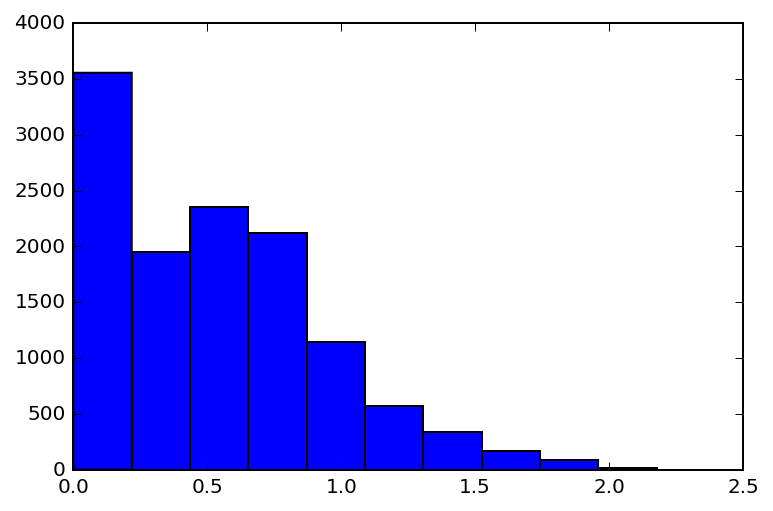

In [183]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  286.,   391.,   559.,   745.,   976.,  1271.,  1502.,  1871.,
         2170.,  2522.]),
 array([  8.28011216e-06,   1.69991504e+00,   3.39982180e+00,
          5.09972856e+00,   6.79963532e+00,   8.49954208e+00,
          1.01994488e+01,   1.18993556e+01,   1.35992624e+01,
          1.52991691e+01,   1.69990759e+01]),
 <a list of 10 Patch objects>)

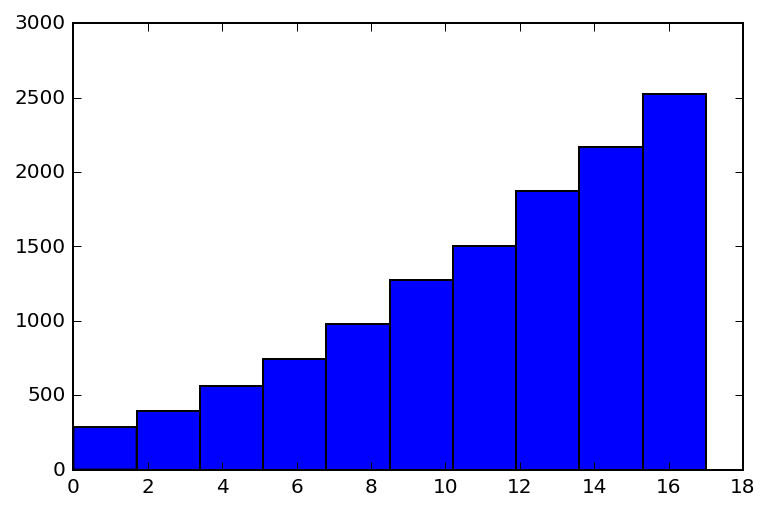

In [184]:
# Histograma 3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

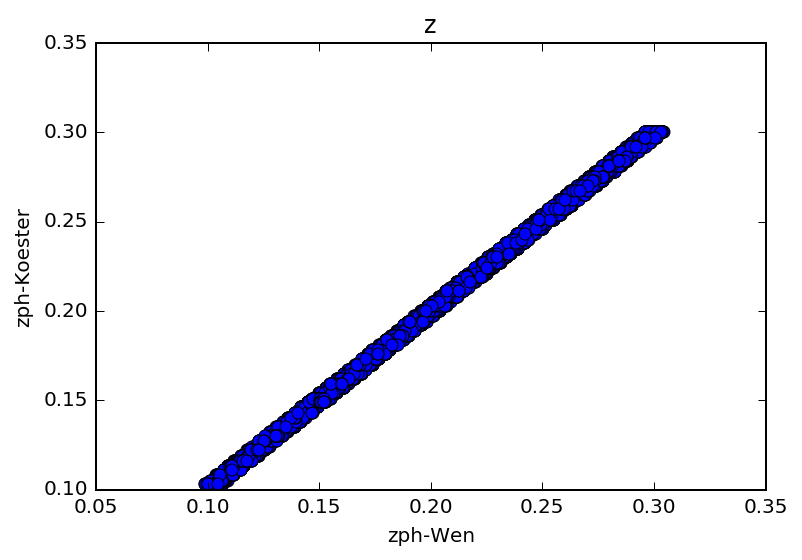

In [185]:
# Plot z vs z
iw = w[idxc_w]
ik = k[idxc_k]
zw = iw['zph']
zk = ik['zph']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zk, 'bo')
plt.xlabel('zph-Wen')
plt.ylabel('zph-Koester')
plt.title('z')

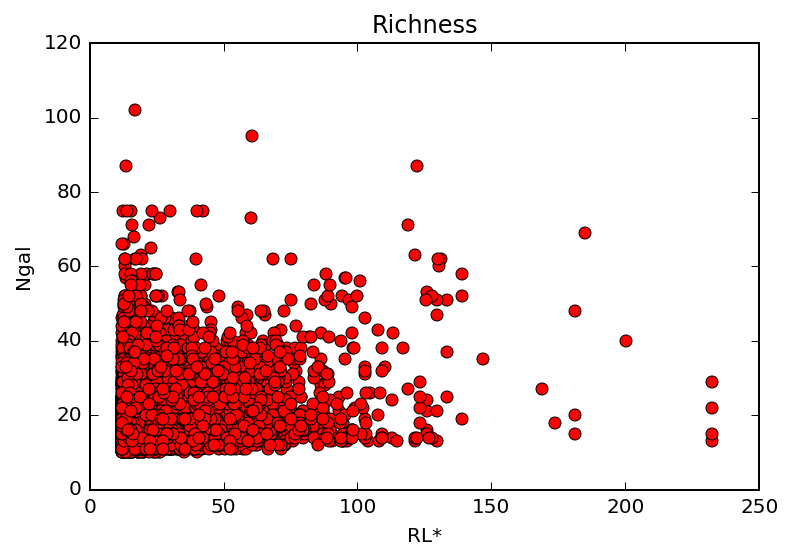

In [186]:
# Plor rich vs rich
rw = iw['RL*']
rk = ik['Ngal']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rw,rk, 'ro')
plt.xlabel('RL*')
plt.ylabel('Ngal')
plt.title('Richness')

(0, 10)

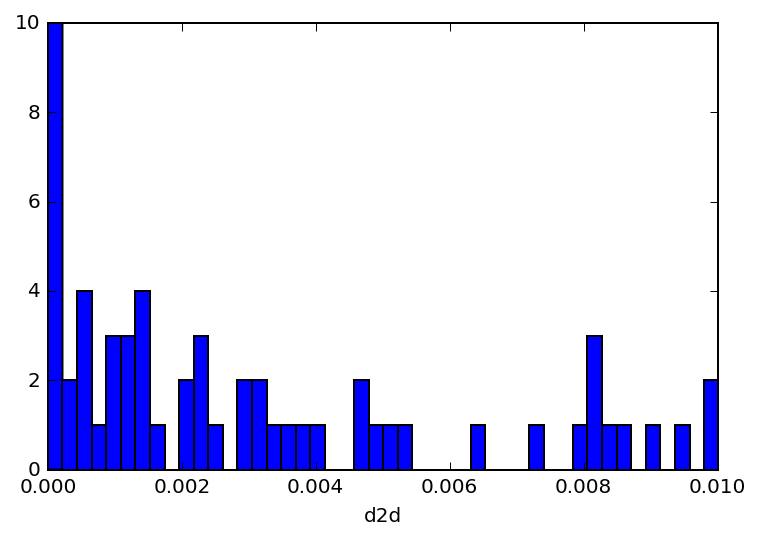

In [187]:
plt.hist(d2d, bins=10000)
plt.xlabel('d2d')
plt.xlim(0,0.01)
plt.ylim(0,10)

In [188]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_k))
print len(idxc_w[d2d<0.002*u.deg])
print len(idxc_r[d2d<0.002*u.deg])

obje_wk = idxc_w[d2d<0.002*u.deg]
obje_kw = idxc_k[d2d<0.002*u.deg]

o_wk = w[obje_wk]
o_kw = k[obje_kw]

ra_wk = o_wk['RAJ2000']
dec_wk = o_wk['DEJ2000']
z_wk = o_wk['zph']

ra_kw = o_kw['RAJ2000']
dec_kw = o_kw['DEJ2000']
z_kw = o_kw['zph']

8652
7650
2106
2106


/Users/lucascoimbra257/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 18087 but corresponding boolean dimension is 12293


# Match do Koester com o Rykoff

In [189]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_r, idxc_k, d2d, d3d = c_k.search_around_3d(c_r, i*u.kpc)
    lista_i.append(len(idxc_r))
    lista_r.append(i)

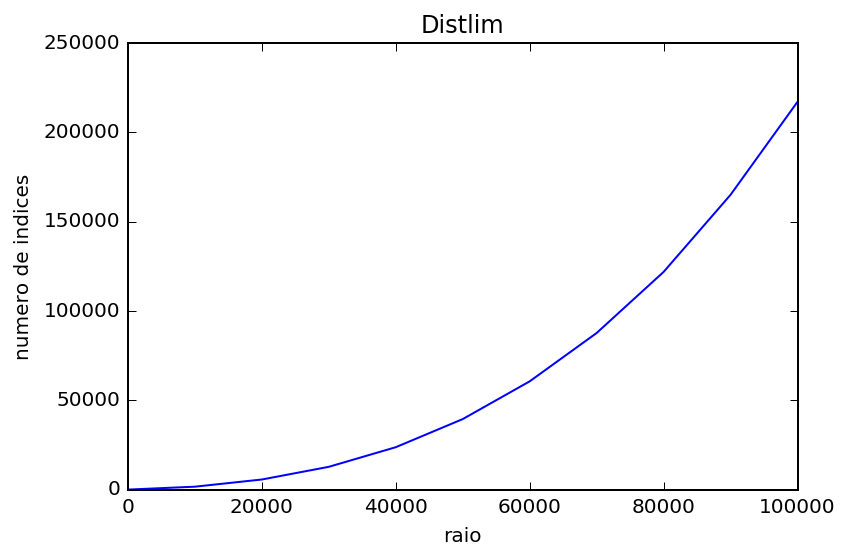

In [190]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.ylabel('numero de indices')
plt.xlabel('raio')
plt.title('Distlim')

In [191]:
print 'Objects around to catalog 3d'
idxc_r, idxc_k, d2d, d3d = c_k.search_around_3d(c_r, 30000*u.kpc) 
print 'Números de objetos do rykoff =',len(idxc_r)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do rykoff = 12753
Números de objetos do koester = 12753


(array([ 3739.,  2286.,  2456.,  2158.,  1111.,   518.,   242.,   151.,
           72.,    20.]),
 array([  1.97991113e-07,   3.79827294e-01,   7.59654390e-01,
          1.13948149e+00,   1.51930858e+00,   1.89913568e+00,
          2.27896277e+00,   2.65878987e+00,   3.03861697e+00,
          3.41844406e+00,   3.79827116e+00]),
 <a list of 10 Patch objects>)

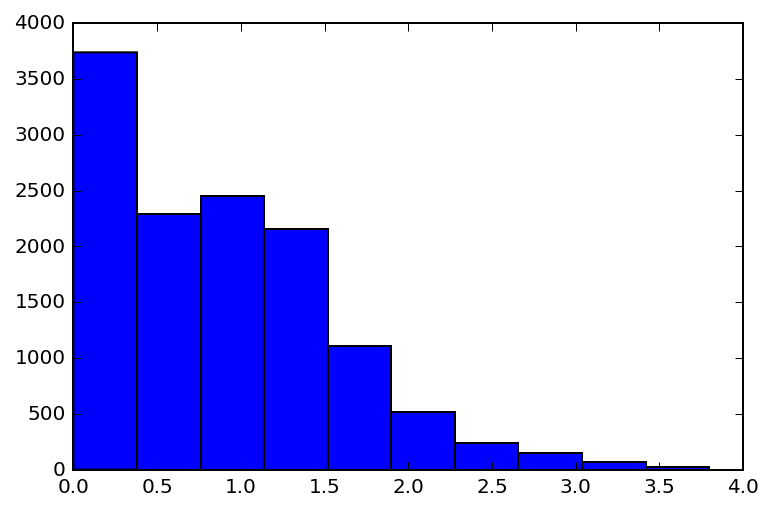

In [192]:
# Histograma de d2d - Números de objetos x distâcia em função de Ra e Dec 
plt.hist(d2d)

(array([  292.,   419.,   676.,   849.,  1042.,  1333.,  1610.,  1813.,
         2209.,  2510.]),
 array([  0.03972055,   3.03572536,   6.03173017,   9.02773498,
         12.0237398 ,  15.01974461,  18.01574942,  21.01175424,
         24.00775905,  27.00376386,  29.99976867]),
 <a list of 10 Patch objects>)

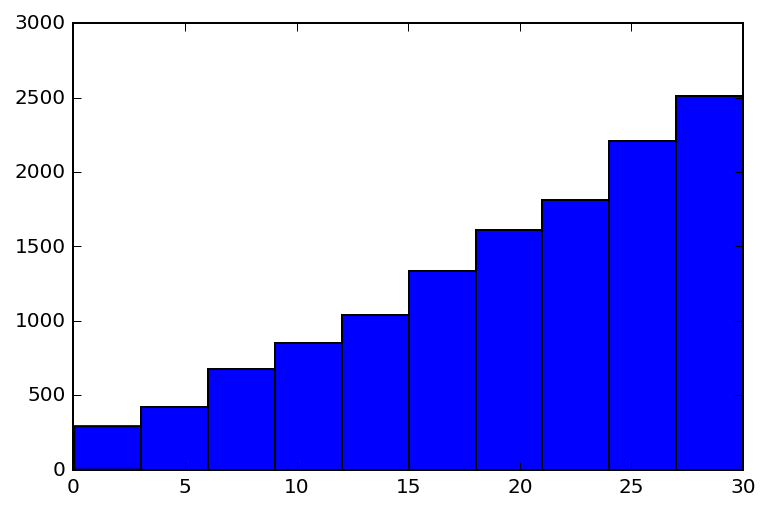

In [193]:
# Histograma de d3d - Números de objetos x distâcia em função de Ra, Dec e z
plt.hist(d3d)

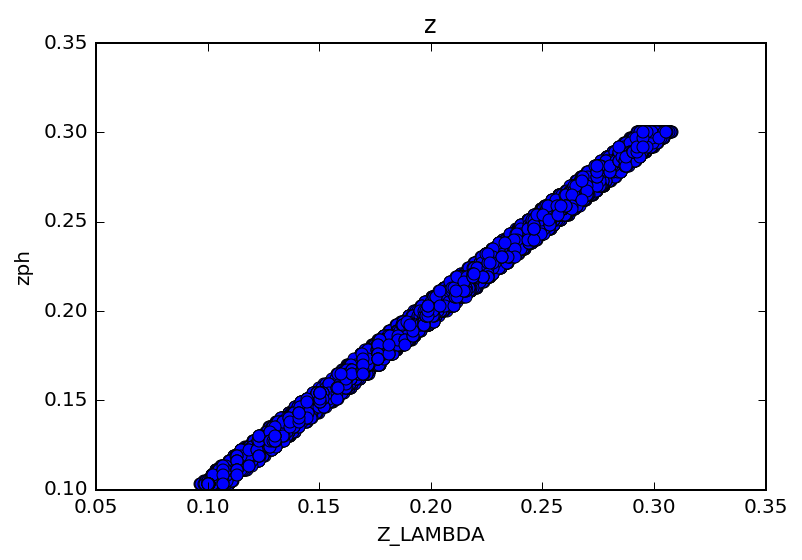

In [194]:
# Plot z vs z
ir = r[idxc_r]
ik = k[idxc_k]
zr = ir['Z_LAMBDA']
zk = ik['zph']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zr,zk, 'bo')
plt.xlabel('Z_LAMBDA')
plt.ylabel('zph')
plt.title('z')

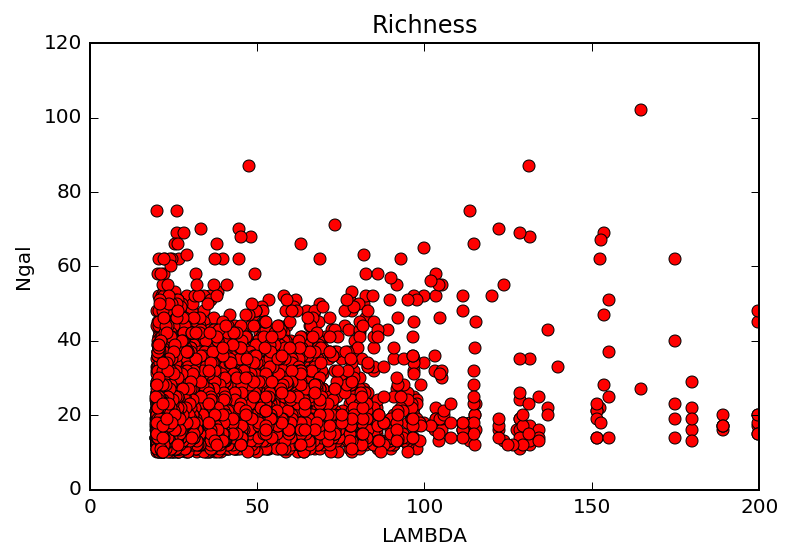

In [195]:
# Plor rich vs rich
rr = ir['LAMBDA']
rk = ik['Ngal']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rr,rk, 'ro')
plt.xlabel('LAMBDA')
plt.ylabel('Ngal')
plt.title('Richness')

(0, 10)

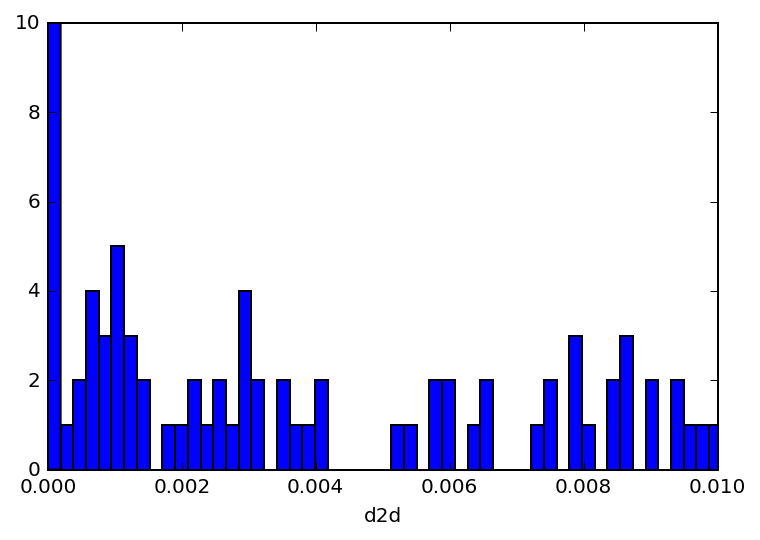

In [196]:
plt.hist(d2d, bins=20000)
plt.xlabel('d2d')
plt.xlim(0,0.01)
plt.ylim(0,10)

In [197]:
print len(np.unique(idxc_k))
print len(np.unique(idxc_r))
print len(idxc_k[d2d<0.002*u.deg])
print len(idxc_r[d2d<0.002*u.deg])

obje_kr = idxc_k[d2d<0.002*u.deg]
obje_rk = idxc_r[d2d<0.002*u.deg]

o_kr = k[obje_kr]
o_rk = r[obje_rk]

ra_kr = o_kr['RAJ2000']
dec_kr = o_kr['DEJ2000']
z_kr = o_kr['zph']

ra_rk = o_rk['RA']
dec_rk = o_rk['DEC']
z_rk = o_rk['Z_LAMBDA']

7514
4450
1806
1806


# Diagrama de Venn

In [198]:
# Formatando wr
lista_wr = []
for i in range(0,len(o_wr)):
    lista_wr.append('%.1f_%.1f_%.1f'%(ra_wr[i], dec_wr[i], z_wr[i]))
print len(lista_wr)

3779


In [199]:
# Formatando rw
lista_rw = []
for i in range(0,len(o_rw)):
    lista_rw.append('%.1f_%.1f_%.1f'%(ra_rw[i], dec_rw[i], z_rw[i]))
print len(lista_rw)

3779


In [200]:
# Formatando wk
lista_wk = []
for i in range(0,len(o_wk)):
    lista_wk.append('%.1f_%.1f_%.1f'%(ra_wk[i], dec_wk[i], z_wk[i]))
print len(lista_wk)

2106


In [201]:
# Formatando kw
lista_kw = []
for i in range(0,len(o_kw)):
    lista_kw.append('%.1f_%.1f_%.1f'%(ra_kw[i], dec_kw[i], z_kw[i]))
print len(lista_kw)

2106


In [202]:
# Formatando kr
lista_kr = []
for i in range(0,len(o_kr)):
    lista_kr.append('%.1f_%.1f_%.1f'%(ra_kr[i], dec_kr[i], z_kr[i]))
print len(lista_kr)

1806


In [203]:
# Formatando rk
lista_rk = []
for i in range(0,len(o_rk)):
    lista_rk.append('%.1f_%.1f_%.1f'%(ra_rk[i], dec_rk[i], z_rk[i]))
print len(lista_rk)

1806


In [204]:
# Match de wk e wr
lista_wkr = []
for wk in lista_wk: 
    for wr in lista_wr:
        if wk==wr:
            lista_wkr.append(wk)
print len(lista_wkr)

400


In [205]:
# Match de rw e rk
lista_rwk = []
for rw in lista_rw: 
    for rk in lista_rk:
        if rw==rk:
            lista_rwk.append(rw)
print len(lista_rwk)

683


In [206]:
# Match de kw e kr
lista_kwr = []
for kw in lista_kw: 
    for kr in lista_kr:
        if kw==kr:
            lista_kwr.append(kw)
print len(lista_kwr)

542


In [207]:
# Match de wk e rw
lista_wkrw = []
for wk in lista_wk: 
    for rw in lista_rw:
        if wk==rw:
            lista_wkrw.append(wk)
print len(lista_wkrw)

393


In [208]:
# Match de wk e rk
lista_wkrk = []
for wk in lista_wk: 
    for rk in lista_rk:
        if wk==rk:
            lista_wkrk.append(wk)
print len(lista_wkrk)

520


In [209]:
# Match de wk e kw
lista_wkkw = []
for wk in lista_wk: 
    for kw in lista_kw:
        if wk==kw:
            lista_wkkw.append(wk)
print len(lista_wkkw)

2062


In [210]:
# Match de wk e kr
lista_wkkr = []
for wk in lista_wk: 
    for kr in lista_kr:
        if wk==kr:
            lista_wkkr.append(wk)
print len(lista_wkkr)

527


In [211]:
# Match de rw e wr
lista_rwwr = []
for rw in lista_rw: 
    for wr in lista_wr:
        if rw==wr:
            lista_rwwr.append(wr)
print len(lista_rwwr)

3671


In [212]:
# Match de rw e kw
lista_rwkw = []
for rw in lista_rw: 
    for kw in lista_kw:
        if rw==kw:
            lista_rwkw.append(rw)
print len(lista_rwkw)

391


In [213]:
# Match de rw e kr
lista_rwkr = []
for rw in lista_rw: 
    for kr in lista_kr:
        if rw==kr:
            lista_rwkr.append(rw)
print len(lista_rwkr)

663


In [214]:
# Match de wr e rk
lista_wrrk = []
for rk in lista_rk: 
    for wr in lista_wr:
        if rk==wr:
            lista_wrrk.append(rk)
print len(lista_wrrk)

663


In [215]:
# Match de wr e kw
lista_wrkw = []
for kw in lista_kw: 
    for wr in lista_wr:
        if kw==wr:
            lista_wrkw.append(kw)
print len(lista_wrkw)

392


In [216]:
# Match de wr e kr
lista_wrkr = []
for kr in lista_kr: 
    for wr in lista_wr:
        if kr==wr:
            lista_wrkr.append(kr)
print len(lista_wrkr)

649


In [217]:
# Match de rk e kw
lista_rkkw = []
for rk in lista_rk: 
    for kw in lista_kw:
        if rk==kr:
            lista_rkkw.append(rk)
print len(lista_rkkw)

2106


In [218]:
# Match de rk e kr
lista_rkkr = []
for rk in lista_rk: 
    for kr in lista_kr:
        if rk==kr:
            lista_rkkr.append(kr)
print len(lista_rkkr)

1730


In [219]:
# Match de wr, kr e rk
lista_wrkrrk = []
for rkkr in lista_rkkr: 
    for wr in lista_wr:
        if rkkr==wr:
            lista_wrkrrk.append(wr)
print len(lista_wrkrrk)

646


In [220]:
# Match de wk, kr e rk
lista_wkkrrk = []
for rkkr in lista_rkkr: 
    for wk in lista_wk:
        if rkkr==wk:
            lista_wkkrrk.append(wk)
print len(lista_wkkrrk)

515


In [221]:
# Match de rw, kr e rk
lista_rwkrrk = []
for rkkr in lista_rkkr: 
    for rw in lista_rw:
        if rkkr==rw:
            lista_rwkrrk.append(rw)
print len(lista_rwkrrk)

663


In [222]:
# Match de kw, kr e rk
lista_kwkrrk = []
rkkr = range(0,len(lista_rkkr))
kw = range(0,len(lista_kw))
for rkkr in lista_rkkr: 
    for kw in lista_kw:
        if rkkr==kw:
            lista_kwkrrk.append(kw)
print len(lista_kwkrrk)

525


In [223]:
# Formatando Wen
ra_w = w['RAJ2000']
dec_w = w['DEJ2000']
z_w = w['zph']
lista_w = []
for i in range(0,len(w)):
    lista_w.append('%.1f_%.1f_%.1f'%(ra_w[i], dec_w[i], z_w[i]))
print len(lista_w)

80917


In [224]:
# Formatando Rykoff
ra_r = r['RA']
dec_r = r['DEC']
z_r = r['Z_LAMBDA']
lista_r = []
for i in range(0,len(r)):
    lista_r.append('%.1f_%.1f_%.1f'%(ra_r[i], dec_r[i], z_r[i]))
print len(lista_r)

18758


In [225]:
# Formatando Koester
ra_k = k['RAJ2000']
dec_k = k['DEJ2000']
z_k = k['zph']
lista_k = []
for i in range(0,len(k)):
    lista_k.append('%.1f_%.1f_%.1f'%(ra_k[i], dec_k[i], z_k[i]))
print len(lista_k)

13611


Diagrama de Venn


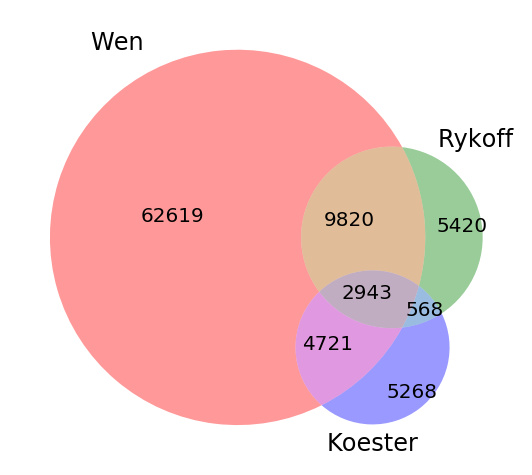

In [226]:
print("\033[43;30mDiagrama de Venn\033[m")
Wen = set(lista_w)
Rykoff = set(lista_r)
Koester = set(lista_k)
venn3([Wen, Rykoff, Koester], ('Wen', 'Rykoff', 'Koester'))
plt.show()